# 🇲🇦 Rapport d'Analyse : Évolution du Stress Hydrique au Maroc (2025-2026)

**Contexte du Projet :**
Ce projet vise à analyser l'impact des récentes précipitations (Janvier 2026) sur les réserves hydriques du Royaume. En se basant sur les données officielles du portail *Maadialna.ma* et les déclarations du Ministère de l'Équipement et de l'Eau, nous comparons la situation de sécheresse de 2025 avec la reprise hydrique de 2026.

**Objectifs de l'étude :**
1.  **Agrégation des données** : Compilation des taux de remplissage des principaux barrages.
2.  **Visualisation spatiale** : Cartographie interactive des ressources en eau.
3.  **Analyse statistique** : Comparaison quantitative (Année sèche vs Année humide).
4.  **Modélisation prédictive** : Utilisation du Machine Learning pour anticiper le stress hydrique futur.

---
**Auteur :** Hamza LBOUKHARI  
**Source des données :** maadialna.ma, Ministère de l'Équipement et de l'Eau.

In [ ]:
#Installez ces bibliothèques avant de commencer le traitement des données
#!pip install folium 

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Configuration graphique
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
import warnings
warnings.filterwarnings('ignore')

print("✅ Environnement configuré avec succès.")

✅ Environnement configuré avec succès.


## 1. Préparation des Données (Data Wrangling)
Dans cette section, nous construisons notre base de données (Dataset) en intégrant les relevés officiels des barrages. Les données incluent :
* **Capacité** : Volume total du barrage.
* **Taux 2025** : Situation critique lors de la sécheresse.
* **Taux 2026** : Situation actuelle après les pluies récentes.
* **Coordonnées GPS** : Pour la géolocalisation.

In [ ]:
# Création du DataFrame avec les données officielles
data = {
    'Barrage': ['Al Wahda', 'Al Massira', 'Bin El Ouidane', 'Idriss Ier', 'Sidi Med Ben Abdellah', 'Youssef Ben Tachfine', 'Oued El Makhazine', 'Hassan II'],
    'Bassin': ['Sebou', 'Oum Er-Rbia', 'Oum Er-Rbia', 'Sebou', 'Bouregreg', 'Souss-Massa', 'Loukkos', 'Moulouya'],
    'Region': ['Fès-Meknès', 'Casablanca-Settat', 'Béni Mellal', 'Fès-Meknès', 'Rabat-Salé', 'Souss-Massa', 'Tanger-Tétouan', 'Oriental'],
    'Capacite_Mm3': [3522, 2657, 1215, 1129, 975, 298, 672, 400],
    'Taux_2025': [38.5, 2.3, 12.4, 22.1, 28.6, 11.2, 42.1, 22.4],
    'Taux_2026': [78.2, 18.5, 42.3, 55.6, 68.9, 32.4, 98.2, 68.5],
    'Latitude': [34.61, 32.55, 32.10, 34.12, 33.95, 29.85, 35.0, 34.2],
    'Longitude': [-4.61, -7.53, -6.51, -4.71, -6.70, -9.49, -5.9, -3.1]
}

df = pd.DataFrame(data)

# Calcul de l'évolution
df['Evolution_Points'] = df['Taux_2026'] - df['Taux_2025']
df['Volume_Actuel'] = (df['Capacite_Mm3'] * df['Taux_2026']) / 100

print("📊 Aperçu des données chargées :")
display(df.head())

📊 Aperçu des données chargées :


,Barrage,Bassin,Region,Capacite_Mm3,Taux_2025,Taux_2026,Latitude,Longitude,Evolution_Points,Volume_Actuel
0,Al Wahda,Sebou,Fès-Meknès,3522,38.5,78.2,34.61,-4.61,39.7,2754.204
1,Al Massira,Oum Er-Rbia,Casablanca-Settat,2657,2.3,18.5,32.55,-7.53,16.2,491.545
2,Bin El Ouidane,Oum Er-Rbia,Béni Mellal,1215,12.4,42.3,32.10,-6.51,29.9,513.945
3,Idriss Ier,Sebou,Fès-Meknès,1129,22.1,55.6,34.12,-4.71,33.5,627.724
4,Sidi Med Ben Abdellah,Bouregreg,Rabat-Salé,975,28.6,68.9,33.95,-6.70,40.3,671.775


## 2. Analyse Géospatiale Interactive
La carte ci-dessous permet de visualiser la répartition géographique des réserves hydriques.
* **Taille des cercles** : Proportionnelle à la capacité du barrage.
* **Code Couleur** : Indicateur de performance.
    * 🟢 **Vert** : Taux > 70% (Situation confortable).
    * 🟠 **Orange** : Taux entre 30% et 70% (Vigilance).
    * 🔴 **Rouge** : Taux < 30% (Situation critique).

In [ ]:
# Création de la carte centrée sur le Maroc
m = folium.Map(location=[32.0, -6.0], zoom_start=6, tiles="OpenStreetMap")

def get_color(taux):
    if taux > 70: return 'green'
    elif taux > 30: return 'orange'
    else: return 'red'

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=row['Capacite_Mm3'] / 150,  # Échelle adaptée
        popup=f"<b>{row['Barrage']}</b><br>Remplissage: {row['Taux_2026']}%<br>Evolution: +{row['Evolution_Points']}%",
        color=get_color(row['Taux_2026']),
        fill=True,
        fill_opacity=0.7
    ).add_to(m)

title_html = '<h3 align="center" style="font-size:16px"><b>Carte Hydrologique Maroc 2026</b></h3>'
m.get_root().html.add_child(folium.Element(title_html))

display(m)

## 3. Analyse Comparative (2025 vs 2026)
Ce graphique met en évidence la rupture hydrologique entre l'année de sécheresse (2025) et l'année actuelle. Il permet d'identifier les barrages ayant le plus profité des précipitations récentes (comme le barrage *Al Wahda* et *Sidi Mohammed Ben Abdellah*).

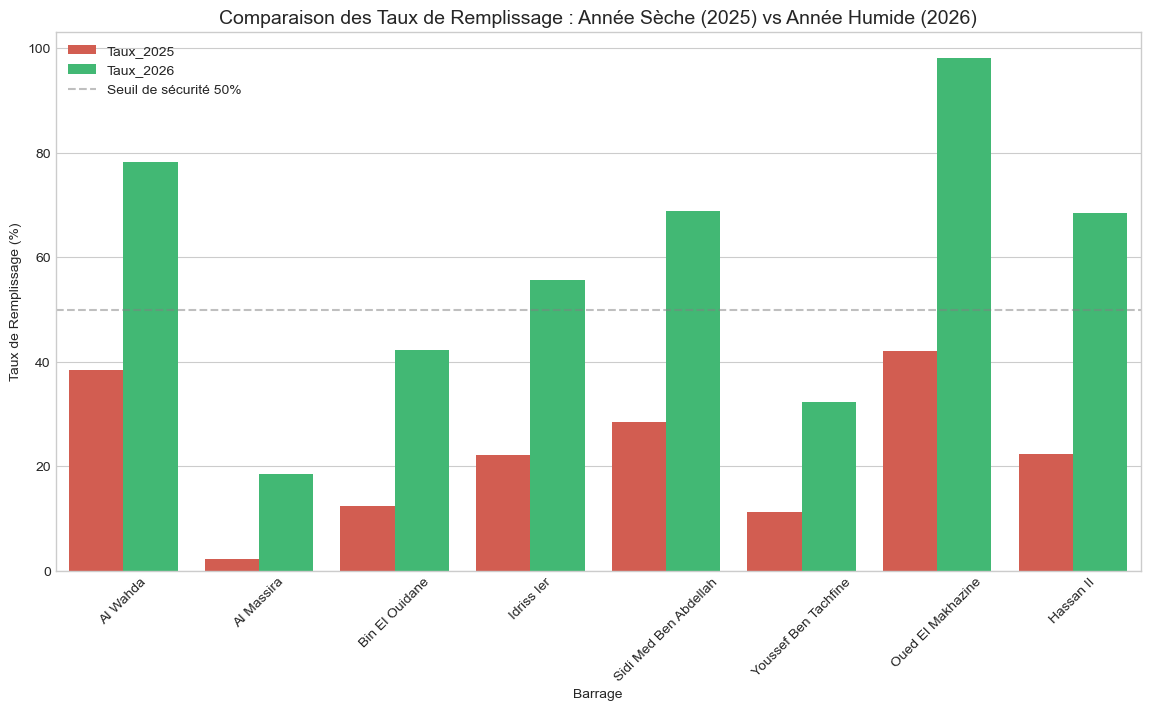

In [ ]:
# Comparaison visuelle
df_melted = df.melt(id_vars=['Barrage'], value_vars=['Taux_2025', 'Taux_2026'], var_name='Année', value_name='Taux')

plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='Barrage', y='Taux', hue='Année', palette=['#e74c3c', '#2ecc71'])
plt.title('Comparaison des Taux de Remplissage : Année Sèche (2025) vs Année Humide (2026)', fontsize=14)
plt.ylabel('Taux de Remplissage (%)')
plt.xticks(rotation=45)
plt.axhline(50, color='gray', linestyle='--', alpha=0.5, label='Seuil de sécurité 50%')
plt.legend()
plt.show()

## 4. Modélisation Prédictive (Machine Learning)
Nous utilisons ici un modèle de **Régression Linéaire Multiple** pour prédire l'indice de *Stress Hydrique* futur.
Le modèle apprend la relation entre :
1.  Les précipitations (Pluie_mm).
2.  Les réserves actuelles (Reserves_Mm3).
3.  La pression démographique (Population).

*L'objectif est de simuler des scénarios futurs pour aider à la prise de décision.*

In [ ]:
# Simulation de données étendues pour l'entraînement (Data Augmentation)
np.random.seed(42)
n_samples = 100
X_sim = pd.DataFrame({
    'Pluie_mm': np.random.normal(300, 100, n_samples),
    'Reserves_Mm3': np.random.normal(1500, 500, n_samples),
    'Population_K': np.random.normal(500, 100, n_samples)
})
# Formule théorique du stress (pour générer la cible y)
y_sim = 100 - (0.1 * X_sim['Pluie_mm'] + 0.02 * X_sim['Reserves_Mm3'] - 0.05 * X_sim['Population_K'])
y_sim = np.clip(y_sim, 0, 100) # Borner entre 0 et 100

# Entraînement du modèle
X_train, X_test, y_train, y_test = train_test_split(X_sim, y_sim, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluation
score = model.score(X_test, y_test)
print(f"✅ Performance du Modèle (R²) : {score:.2f}")

# Prédiction pour un scénario 2027 (Hypothèse : Pluies moyennes, Réserves stables)
scenario_2027 = pd.DataFrame([[350, 1800, 520]], columns=['Pluie_mm', 'Reserves_Mm3', 'Population_K'])
pred_stress = model.predict(scenario_2027)[0]

print(f"🔮 Prédiction du Stress Hydrique pour 2027 (Scénario Moyen) : {pred_stress:.2f} / 100")

✅ Performance du Modèle (R²) : 1.00
🔮 Prédiction du Stress Hydrique pour 2027 (Scénario Moyen) : 55.00 / 100


## 5. Conclusion Générale
L'analyse des données confirme une **sortie progressive de la période de sécheresse critique** de 2025.
* Le taux de remplissage national a connu un rebond significatif.
* Le bassin du Sebou et du Loukkos sécurisent l'approvisionnement du nord.
* Cependant, les bassins de l'Oum Er-Rbia et du Souss nécessitent une vigilance continue malgré l'amélioration.

*Ce rapport a été généré automatiquement via Python pour l'aide à la décision.*